In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('Data .csv')

C:\Users\Gleshna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [9]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The data here is only till 2015 starting from 1990, and present covid 19 analysis I have made seperately in a kaggle notebook by using BIG QUERY public data and used OPEN AQ 
### link for which is 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


We have in total 435742 entries in our dataset.
We also see that we have only two data types: float and object.
There are very few values present for pm2_5 and we have null values in almost all columns except for 'state'

In [ ]:
Let us check exactly how many null values present in each column

In [10]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

Looking at here we have tremendously huge null values in some columns especially in column 'pm2_5'. And  by looking at 'state' column its clear that it's the only column with all non null values

as of now we can totally ignore 'agency' column as well as 'stn_code' column because first of all they have a lot of null values and they ll not be useful for our analysis as of now

also 'sampling_date' and 'date' contain same values and they mean the same . so, we'll drop any one , here I am going to drop 'sampling_date' column

as 'location' is already given 'location_monitoring_station' is redundant for us because it will give actual location of the monitoring station , which is unnessary as of now, because we'll just need location for the analysis.


In [ ]:
let us drop these columns and see the cleaner version of the dataframe

In [12]:
df1=df.drop(['agency','stn_code','sampling_date','location_monitoring_station'],axis=1)

In [13]:
df1.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [72]:
df1.loc[df1['state'] == 'Uttaranchal']

,state,location,type,so2,no2,rspm,spm,pm2_5,date
411093,Uttaranchal,Dehradun,Residential and others,18.7,24.3,158.0,215.0,NaN,3/1/2005
411094,Uttaranchal,Dehradun,Residential and others,18.9,25.6,137.0,183.0,NaN,6/1/2005
411095,Uttaranchal,Dehradun,Residential and others,18.9,24.4,147.0,216.0,NaN,10/1/2005
411096,Uttaranchal,Dehradun,Residential and others,17.6,24.2,165.0,258.0,NaN,12/1/2005
411097,Uttaranchal,Dehradun,Residential and others,17.1,24.8,108.0,175.0,NaN,1/20/2005
411098,Uttaranchal,Dehradun,Residential and others,NaN,NaN,134.0,324.0,NaN,1/22/2005
411099,Uttaranchal,Dehradun,Residential and others,NaN,NaN,157.0,334.0,NaN,3/3/2005
411100,Uttaranchal,Dehradun,Residential and others,NaN,NaN,107.0,418.0,NaN,7/3/2005
411101,Uttaranchal,Dehradun,Residential and others,NaN,NaN,152.0,411.0,NaN,10/3/2005
411102,Uttaranchal,Dehradun,Residential and others,NaN,NaN,116.0,422.0,NaN,3/14/2005


In [73]:
df1.loc[df1['state'] == 'Uttarakhand']

,state,location,type,so2,no2,rspm,spm,pm2_5,date
411030,Uttarakhand,Dehradun,"Residential, Rural and other Areas",17.0,21.0,152.0,265.0,NaN,2/1/2004
411031,Uttarakhand,Dehradun,"Residential, Rural and other Areas",18.0,24.0,184.0,388.0,NaN,8/1/2004
411032,Uttarakhand,Dehradun,"Residential, Rural and other Areas",20.0,24.0,182.0,374.0,NaN,12/1/2004
411033,Uttarakhand,Dehradun,"Residential, Rural and other Areas",22.0,22.0,253.0,462.0,NaN,1/15/2004
411034,Uttarakhand,Dehradun,"Residential, Rural and other Areas",18.0,23.0,146.0,334.0,NaN,1/19/2004
411035,Uttarakhand,Dehradun,"Residential, Rural and other Areas",19.0,20.0,157.0,253.0,NaN,1/23/2004
411036,Uttarakhand,Dehradun,"Residential, Rural and other Areas",19.0,25.0,NaN,NaN,NaN,1/29/2004
411037,Uttarakhand,Dehradun,"Residential, Rural and other Areas",18.0,24.0,NaN,NaN,NaN,3/2/2004
411038,Uttarakhand,Dehradun,"Residential, Rural and other Areas",20.0,25.0,NaN,NaN,NaN,5/2/2004
411039,Uttarakhand,Dehradun,"Residential, Rural and other Areas",16.0,24.0,NaN,NaN,NaN,9/2/2004


so it looks like some years data is present in "uttaranchal" and remaining years data is present in 'Uttarakhand' . So let us merge these rows and make them one

In [74]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df1.replace(replacements, regex = True, inplace = True)


In [ ]:
Let us analyze each column now to find interesting patterns

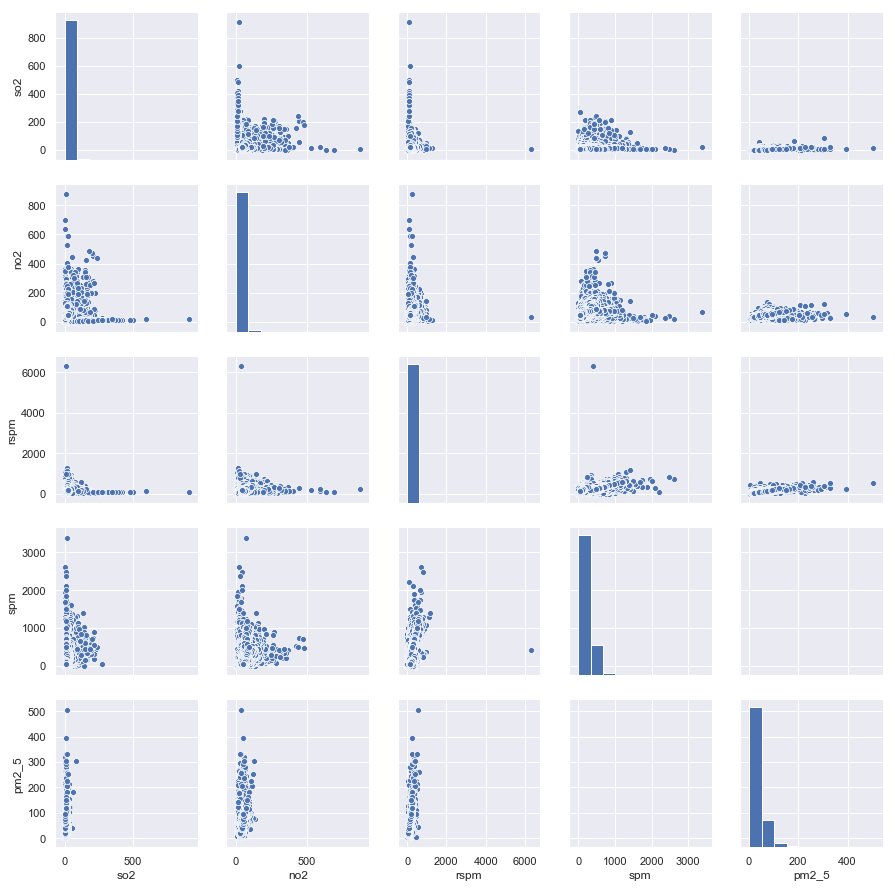

In [75]:
#Scatter plots of numeric columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df1[cols], size = 2.5)
plt.show()

We can talk about the realtionship between all other features here except for 'pm2_5' , simply because of the fact that it has a lot of null values
we can't analyze in detail about all the features by just looking at teh scatter plot let us do further analysis

In [76]:
df1['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     2246
J

In [77]:
df1['location'].value_counts()

Guwahati            9984
Hyderabad           9667
Delhi               8551
Chandigarh          8520
Jaipur              7850
Nagpur              7829
Kolkata             7733
Kanpur              7545
Agra                7306
Kochi               7263
Visakhapatnam       7108
Bangalore           6660
Chennai             6646
Ahmedabad           6256
Lucknow             6194
Ludhiana            6175
Jodhpur             6035
Navi Mumbai         5541
Pune                5179
Nashik              5145
Chandrapur          4782
Kota                4181
Gobindgarh          3976
Jalandhar           3784
Alwar               3746
Udaipur             3741
Thane               3620
Howrah              3601
Parwanoo            3523
Aizawl              3499
                    ... 
Cuncolim             103
Faridkot              97
Kothur                96
Bidar                 88
Hoshiarpur            88
Mathura               78
Konark                78
Chandarpur            77
Imphal                76


In [78]:
df1['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

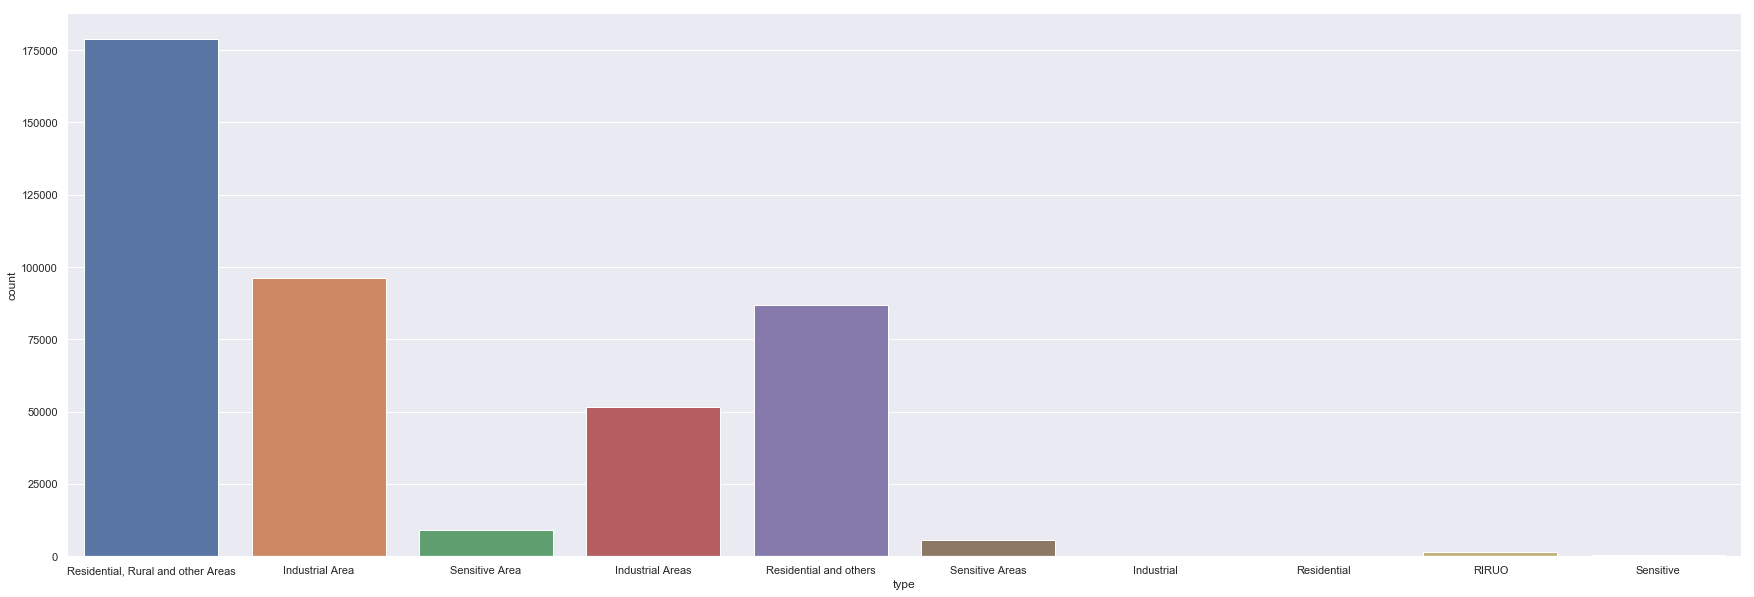

In [79]:
plt.figure(figsize=(30,10))

sns.countplot(df1['type'])
plt.show()

by looking at it,it's clear that industrial area is repeated thrice as well as residential and other so we can classify these into 3 broad categories, so that it's easier to visualize as well cleans the data

In [80]:
#deleting all values which have null in type attribute,whichnwill make it easier to make 3 categories
df2 = df1.dropna(axis = 0, subset = ['type'])

But first before moving ahead let us look at the heatmap

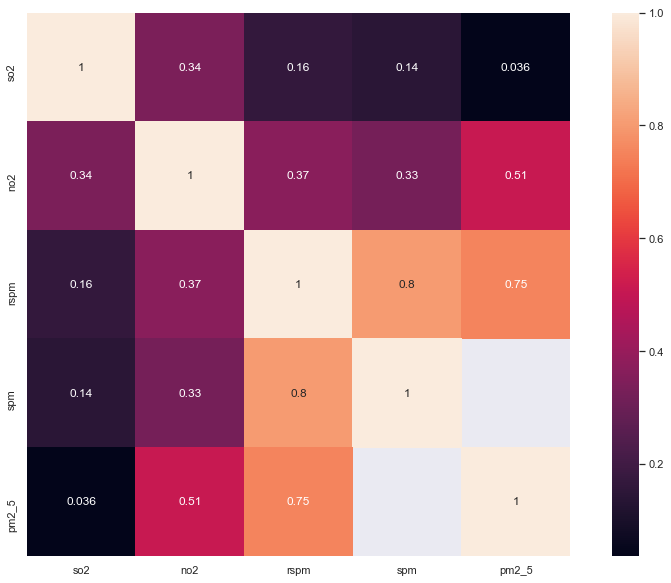

In [81]:
#Correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

It is clear from the correlation matrix that we have some correlation between spm and rspm as also seen from the above scatter plots 

In [82]:
#making 3 categories
l1 = list(df2['type'])
for i in range(0, len(df2)):
    if str(l1[i][0]) == 'R' and l1[i][1] == 'e':
        l1[i] = 'Residential'
    elif str(l1[i][0]) == 'I':
        l1[i] = 'Industrial'
    else:
        l1[i] = 'Other'
    
df2['type']=l1
df2['type'].value_counts()


C:\Users\Gleshna\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Residential    265963
Industrial     148071
Other           16315
Name: type, dtype: int64

As there is also a region called 'RIRUO' I have given two condition for 'Residential' that is the first letter must begin with 'R' followed by second letter 'e'.So I created 2 categories first that is 'Residential' and 'Industrial' and anything that didn't fall into these 2 categories fell into the third general category 'Other'

In [ ]:
now let us plot the same countplot as above and look at the results

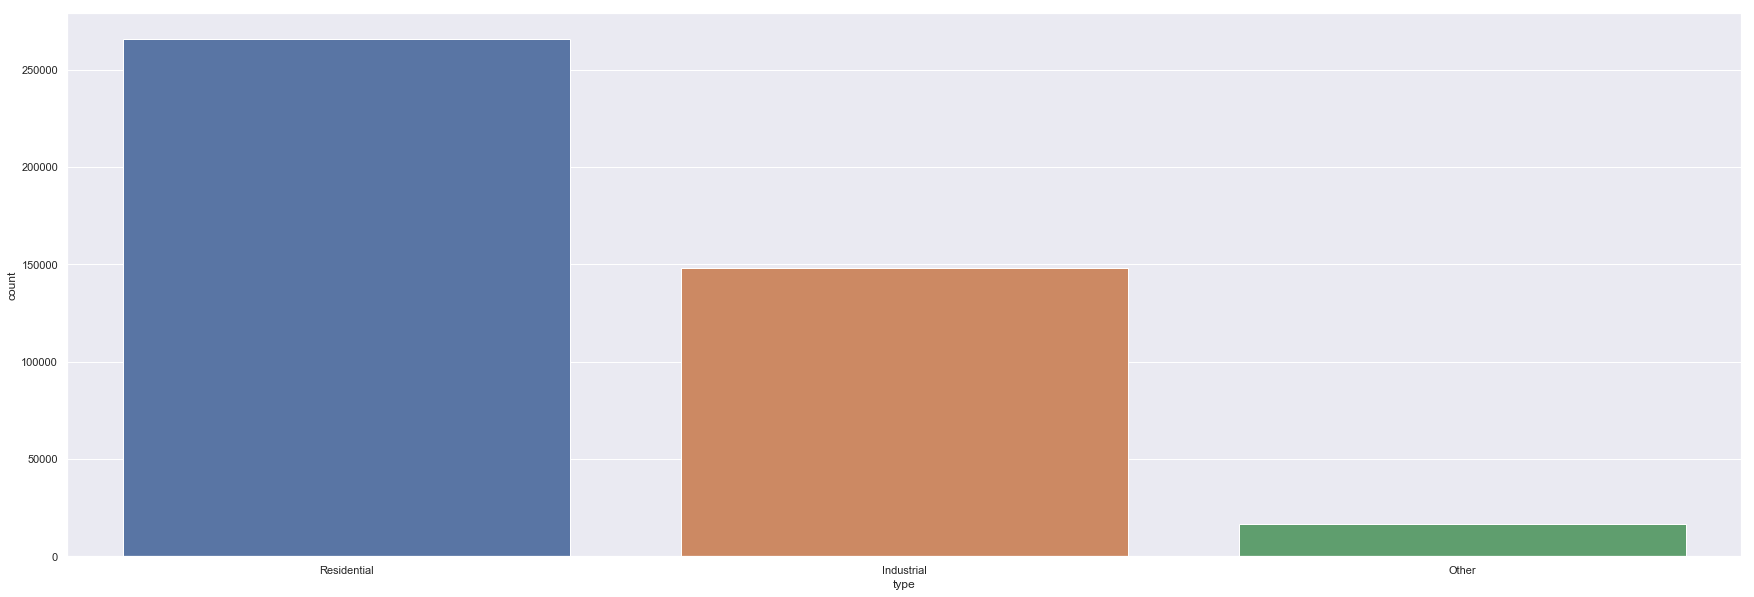

In [83]:
plt.figure(figsize=(30,10))

sns.countplot(df2['type'])
plt.show()

#### Let us plot the concentration of so2 in different states, using bar plots, in descending order.


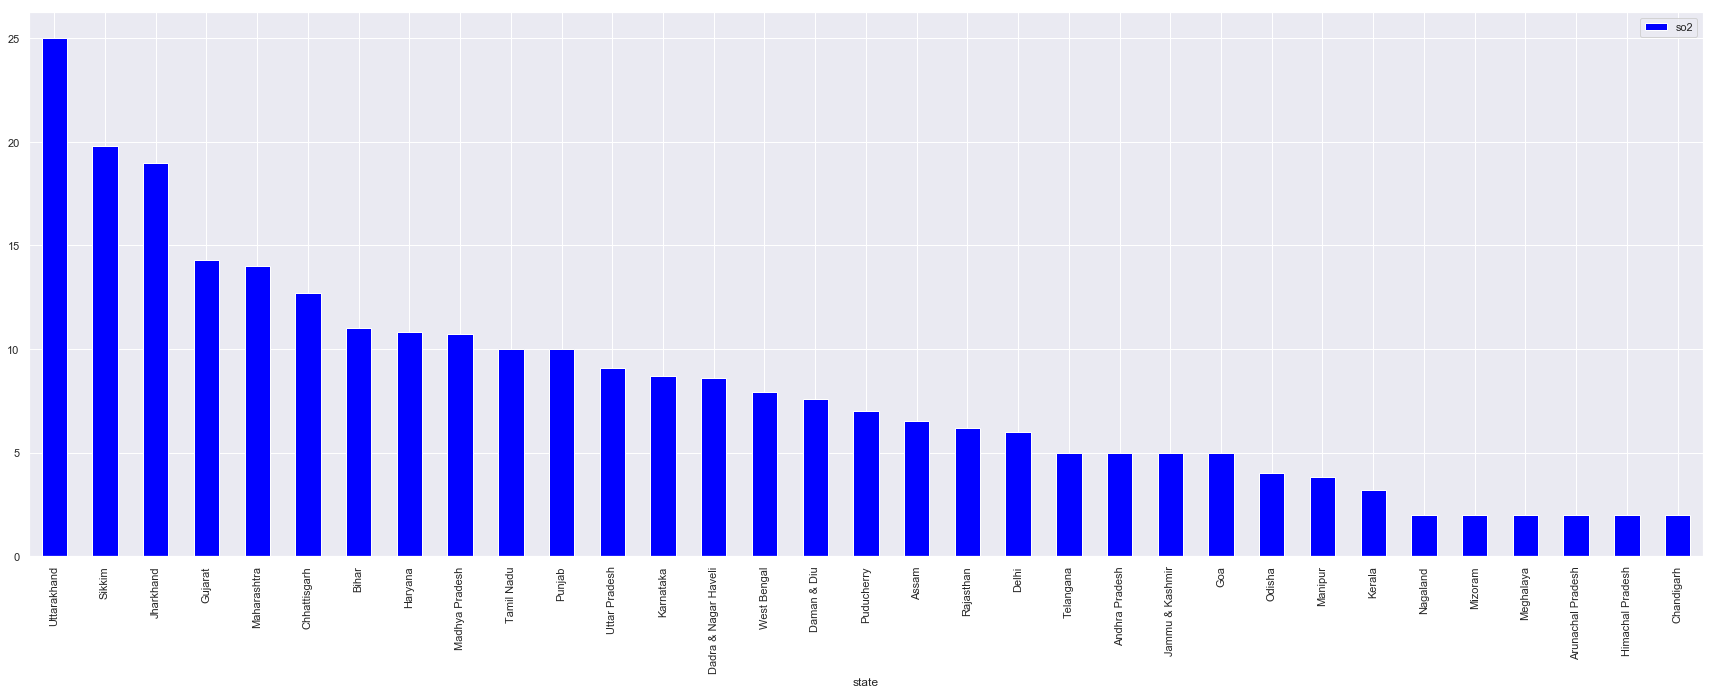

In [84]:

df2[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(color='blue')
plt.show()

We can see that so2 levels which means the amount of sulphur dioxide is highest in Uttarkand and lowest in Himachal Pradesh.
Sulfur dioxide affects human health when it is inhaled. It irritates the nose, throat, and airways to cause coughing, wheezing, shortness of breath, or a tight feeling around the chest. Those most at risk of developing problems if they are exposed to sulfur dioxide are people with asthma or similar conditions. Also, the concentration of sulfur dioxide in the atmosphere can influence the habitat suitability for plant communities, as well as animal life.
Inhaling sulfur dioxide is associated with increased respiratory symptoms and disease, difficulty in breathing, and premature death.
It also causes acid rain.

#### Let us plot the concentration of no2 in different states.


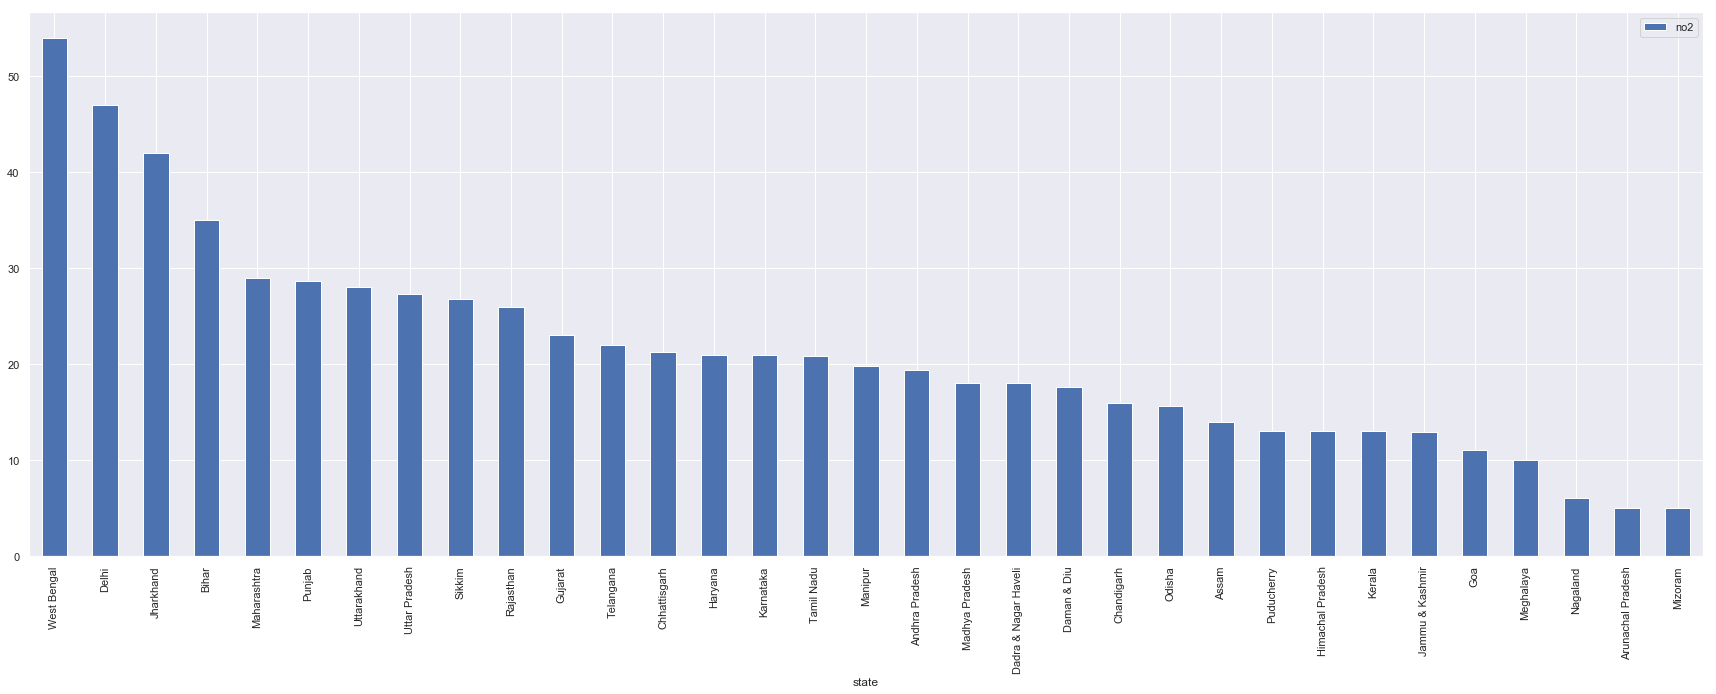

In [85]:
df2[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'b')



we can see that the 'no2' that is nitrogen dioxide measures are hghest in West Bengal but our capital city Delhi is very near and in second position and lowest in Mizoram

The following gives a rough idea of nitrogen dioxide’s impact on health :
10–20 ppm can cause mild irritation of the nose and throat
25–50 ppm can cause oedema leading to bronchitis or pneumonia
Levels above 100 ppm can cause death due to asphyxiation from fluid in the lungs.
High levels of NO₂ can harm vegetation, including leaf damage and reduced growth. It can make vegetation more susceptible to disease and frost damage.
Longer exposures to elevated concentrations of NO₂ may contribute to the development of asthma and potentially increase susceptibility to respiratory infections.

### pm
These are also known as Atmospheric aerosol particles, atmospheric particulate matter, particulate matter (PM) or suspended particulate matter (SPM).
These are microscopic solid or liquid matter suspended in the atmosphere.
Particulates are the deadliest form of air pollution due to their ability to penetrate deep into the lungs and bloodstreams unfiltered, causing permanent DNA mutations, heart attacks, respiratory disease, and premature death.
Worldwide exposure to PM 2.5 contributed to 4.1 million deaths from heart disease and stroke, lung cancer, chronic lung disease, and respiratory infections in 2016. Overall, ambient particulate matter ranks as the sixth leading risk factor for premature death globally.
The internet is filled with the harmful effects of the above pollutants, and hence it makes them an essential factor to be analyzed and considered when discussing air pollution.

### Let us plot the concentration of 'rspm' in different states


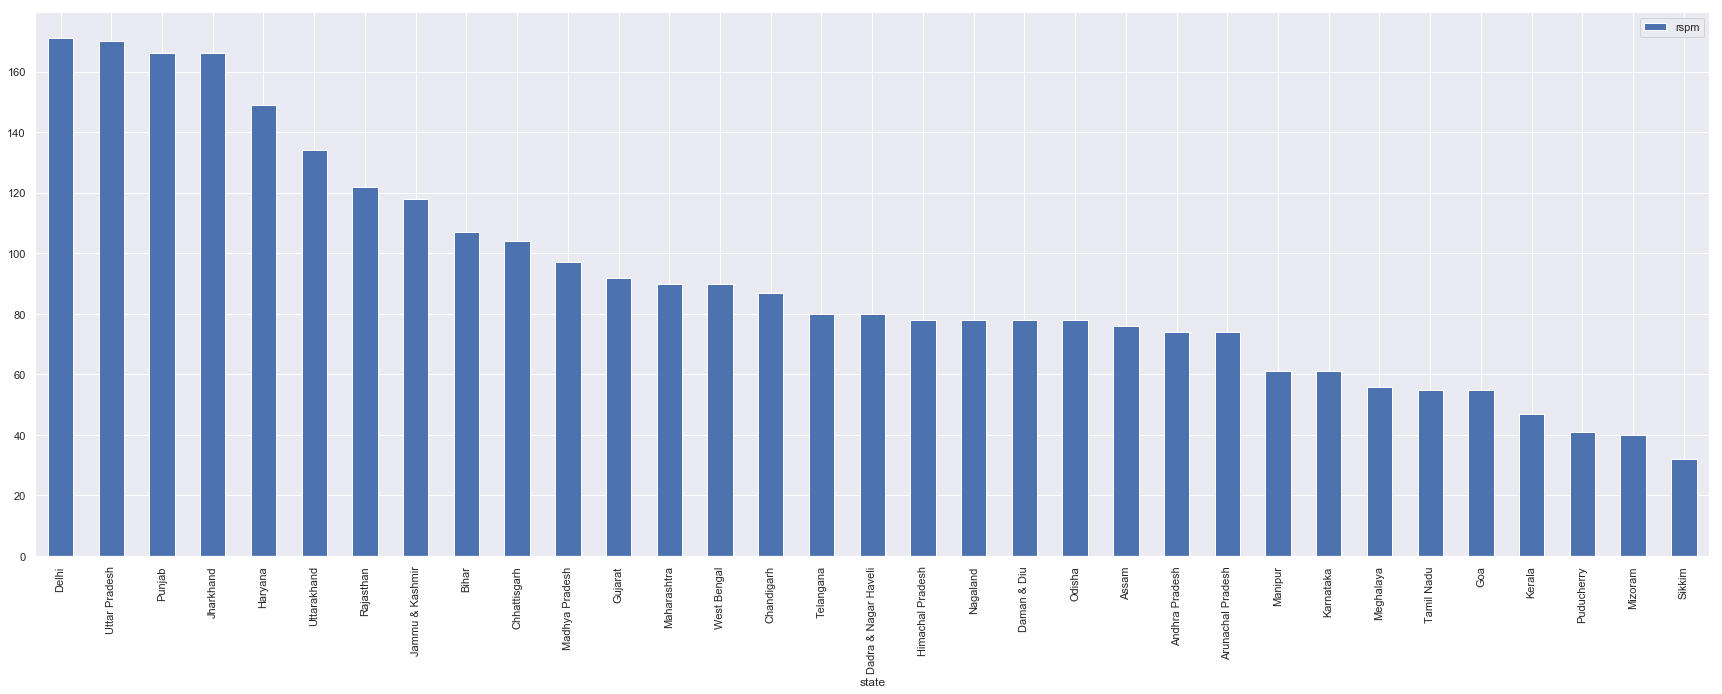

In [86]:

df2[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'b')


 Respirable Suspended Particulate Matter measured that is 'rspm' is highest in Delhi , which doesn't come as news because Delhi is continuously in news all over the nation for air pollution. The significant rise in the pollutants in Delhi has made people suffer a lot and has been responsible for the deaths of thousands.
 But looking above it's clear that Uttar Pradesh is almost close to Delhi, even though the media is not particularly concentrated on news about air pollution in UP as much as in Delhi, but UP is home to more than 20 crore people, also both UP and Delhi are neighbours.
 
 But good news is that states like Sikkim and Mizoram have way too less air pollution

### Let us plot the concentration of 'spm' in different states

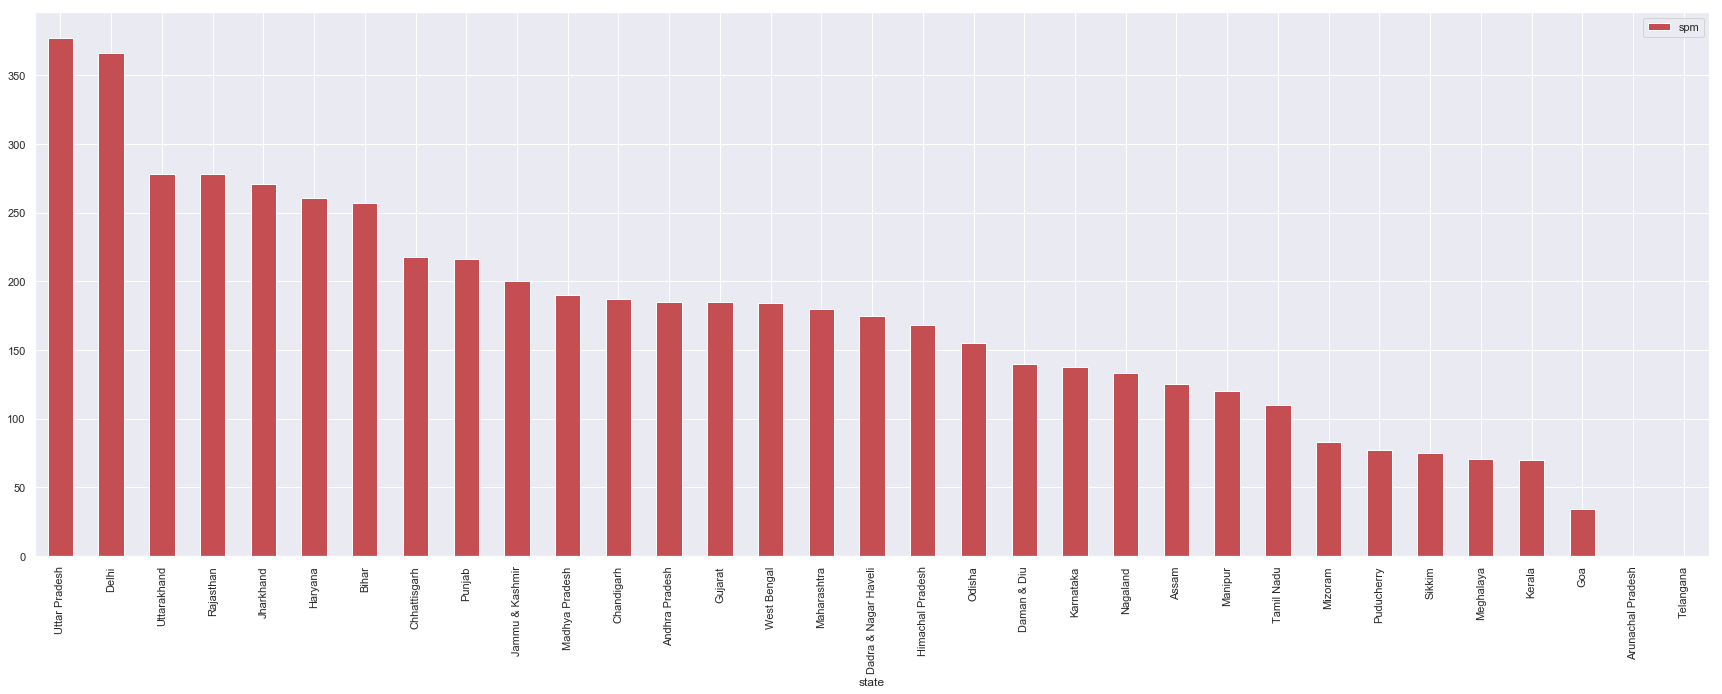

In [87]:
df2[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')


Suspended Particulate Matter measured that is 'spm' is again highest in Uttar Pradesh(UP) and Delhi. UP and Delhi have a comparable concentration of spm as well as rspm.
A news report was found stating :
In 1997, an air quality monitoring station in Lucknow, the capital of Uttar Pradesh, recorded the maximum level of suspended particulate matter (spm) at 2,339 microgrammes per cubic metre (g/cum), more than 11 times the permissible limit for residential areas and four times the limit for industrial areas. This is as high as the maximum ever recorded in Delhi: 2,340 g/cum in 1992.

### let us look at the last feature to analyze that is pm2_5: the value of particulate matter measured/recorded :

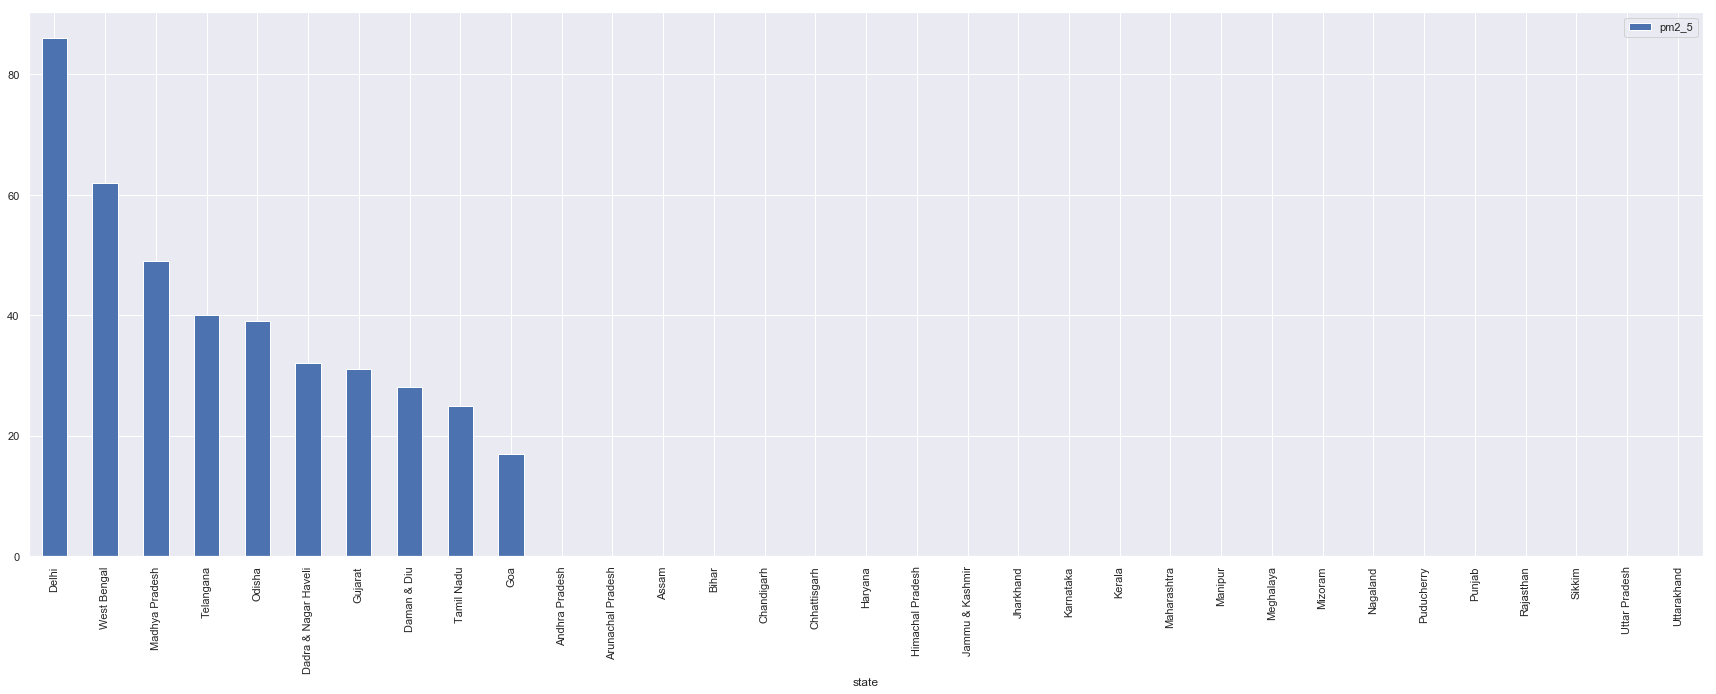

In [88]:
df2[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'b')



In [ ]:
As 'pm2_5' has a lot of null values we are not able to plt for all the states, but by seeing available data we find that Delhi tops the list again followed bt West Bengal

#### Let us extract 'year' column from 'date' feature , so can analyze yearly effect

In [89]:

df2['date'] = pd.to_datetime(df2['date'], format = '%m/%d/%Y')
df2['year'] = df2['date'].dt.year # year
df2['year'] = df2['year'].fillna(0.0).astype(int)
df3 = df2[(df2['year']>0)]


C:\Users\Gleshna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gleshna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gleshna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [90]:
df3.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### correlation matrix for 'so2'

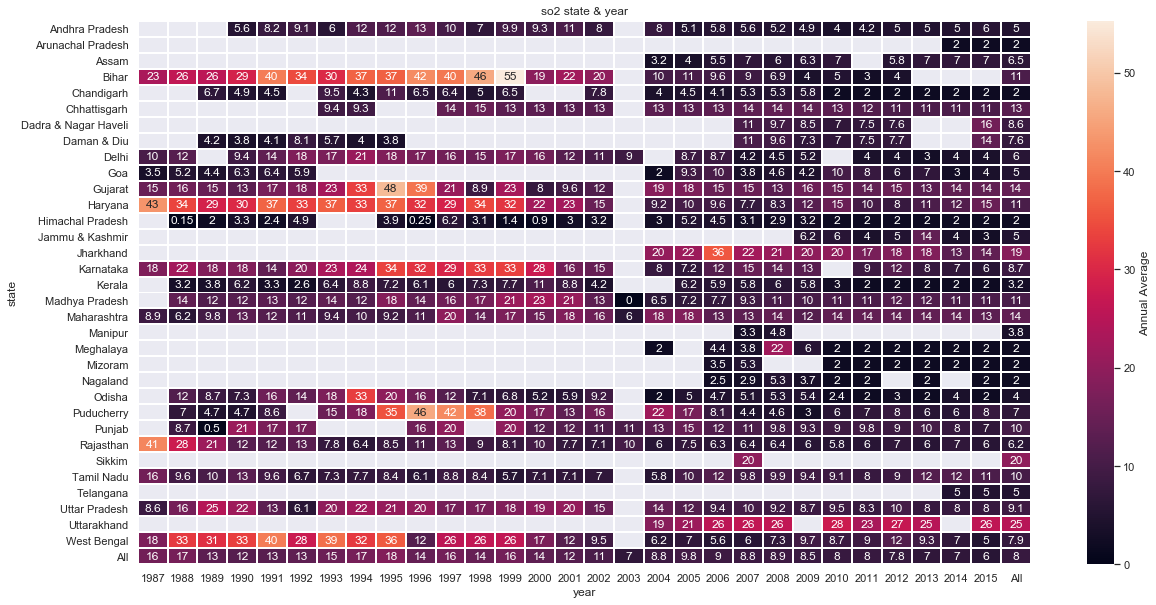

In [93]:
 
f, ax = plt.subplots(figsize = (20,10))
ax.set_title('{} state & year'.format('so2'))
sns.heatmap(df3.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

according to the heatmap in Bihar 'so2' values are gradually and steadliy increasing over the years from 1987 to 1999 
Interestingly values of 'so2' have reduced after 2000.But Uttarakhand as well as Jharkhand had high values of 'so2' even after year 2000 and values before that are not available, even barplot showed 

### correlation matrix for 'no2'

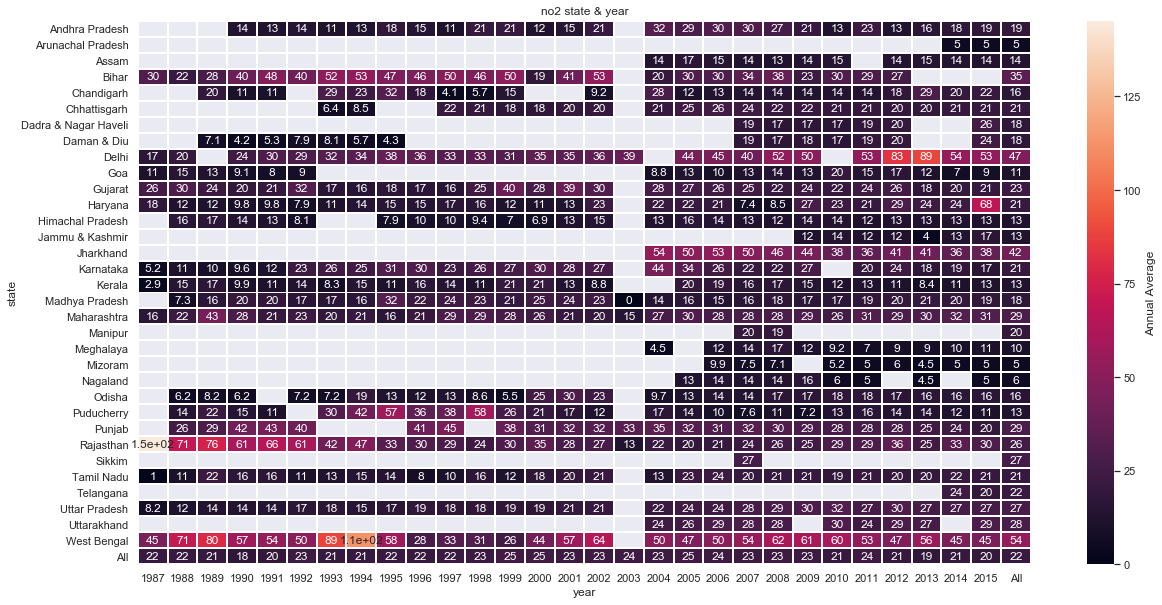

In [94]:

f, ax = plt.subplots(figsize=(20,10))
ax.set_title('{} state & year'.format('no2'))
sns.heatmap(df3.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True,linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

We can see that states like Rajasthan, Bihar, Delhi, Harayana, Jharkhand, West Bengal have experienced a severe level of no2 concentration.
If we look at the heatmap closely, then we see from 2000 onwards the no2 concentrations have increased(as a whole) throughout the country.

### correaltion matrix for 'rspm'

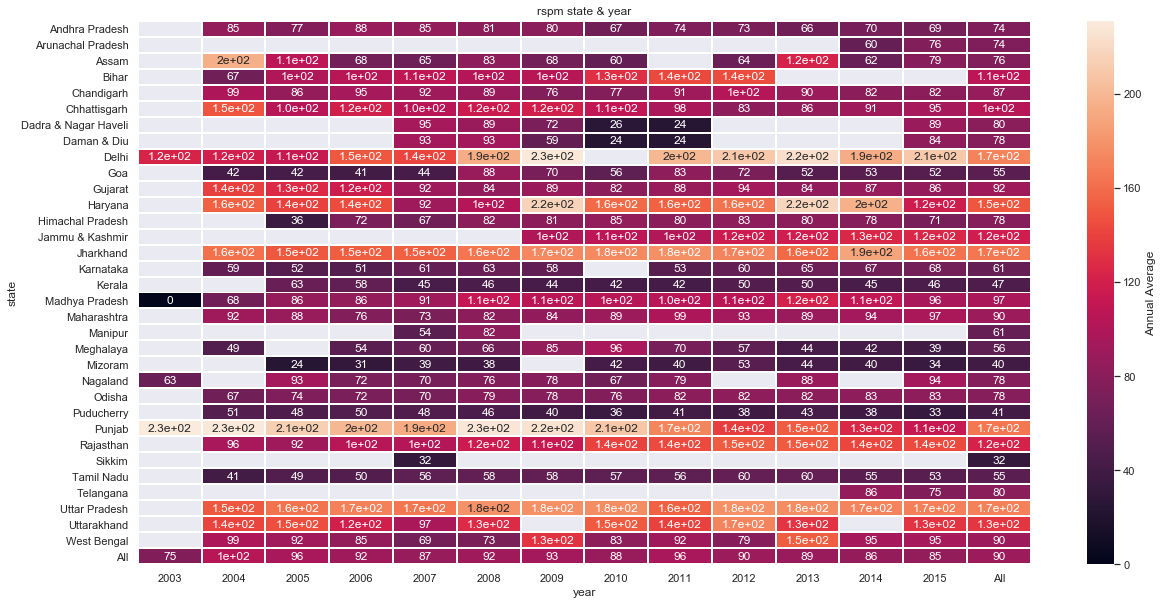

In [95]:
f, ax = plt.subplots(figsize=(20,10))
ax.set_title('{} state & year'.format('rspm'))
sns.heatmap(df3.pivot_table('rspm', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True,linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

Delhi,Uttar Pradesh, Punjab,Haryana,Rajastan,Uttarakhand,Jharkhand have highest levels of 'rspm' 

### correlation matrix for 'spm'

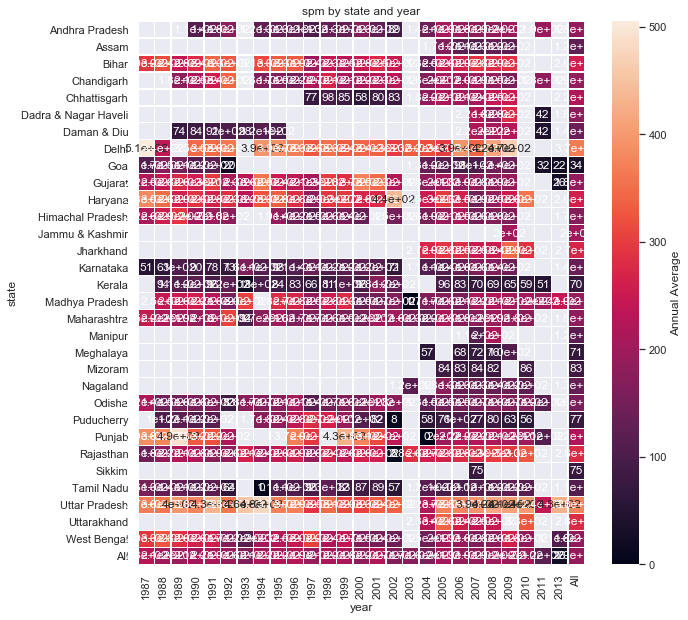

In [99]:

f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df3.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot=True,linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

again same cities like Delhi,Uttar Pradesh ,Punjab,Haryana have high 'spm' levels

From the above analysis, we see that the majorly affected states in India by air pollution belong to the northern region.
States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require immediate action.
We also saw that even if a state had a high level of pollutants, there were some regions in the states that were not polluted.
And according to the correlation matrix states with high 'rspm' levels also had high 'spm' levels
From the heatmap, we conclude that some states were heavily polluted in the early stages(1980 to 2000) but, later, were taken care of.Reason could be anything and there is also an ACT called The Air (Prevention and Control of Pollution) Act, 1981 was to provide for the prevention, control and abatement of air pollution, which might have also made the difference